In [1]:
import pandas as pd

In [3]:
bse=pd.read_csv('E:\ML PROJECTS\TATA MOTORS PRICE PREDICTION\Dataset\TATAMOTORS_BSE_01Oct20-01Oct21.csv')

In [4]:
nse=pd.read_csv("E:\ML PROJECTS\TATA MOTORS PRICE PREDICTION\Dataset\TATAMTRDVR_NSE_01Oct20-01Oct21.csv")

In [6]:
nyse=pd.read_csv("E:\ML PROJECTS\TATA MOTORS PRICE PREDICTION\Dataset\TTM_NYSE_01Oct20-01Oct21.csv")

In [8]:
dataset=pd.concat([bse,nse,nyse])

In [9]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-01,135.699997,136.500000,132.600006,133.500000,133.500000,1674311.0
1,2020-10-05,137.000000,137.500000,132.050003,133.899994,133.899994,2800303.0
2,2020-10-06,137.800003,145.699997,135.899994,144.850006,144.850006,10190922.0
3,2020-10-07,144.100006,144.500000,139.800003,141.000000,141.000000,4032654.0
4,2020-10-08,142.800003,143.350006,139.649994,140.899994,140.899994,2491175.0


In [10]:
dataset.shape

(749, 7)

In [14]:
dataset.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [18]:
dataset=dataset.dropna().reset_index()

In [20]:
dataset.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2020-10-01,135.699997,136.500000,132.600006,133.500000,133.500000,1674311.0
1,1,2020-10-05,137.000000,137.500000,132.050003,133.899994,133.899994,2800303.0
2,2,2020-10-06,137.800003,145.699997,135.899994,144.850006,144.850006,10190922.0
3,3,2020-10-07,144.100006,144.500000,139.800003,141.000000,141.000000,4032654.0
4,4,2020-10-08,142.800003,143.350006,139.649994,140.899994,140.899994,2491175.0


In [21]:
dataset=dataset.drop("index",axis=1)

In [22]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-01,135.699997,136.500000,132.600006,133.500000,133.500000,1674311.0
1,2020-10-05,137.000000,137.500000,132.050003,133.899994,133.899994,2800303.0
2,2020-10-06,137.800003,145.699997,135.899994,144.850006,144.850006,10190922.0
3,2020-10-07,144.100006,144.500000,139.800003,141.000000,141.000000,4032654.0
4,2020-10-08,142.800003,143.350006,139.649994,140.899994,140.899994,2491175.0


In [45]:
dataset[['Year', 'Month', 'Day']] =dataset["Date"].str.split("-",expand=True)

In [46]:

dataset.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2020-10-01,135.699997,136.500000,132.600006,133.500000,133.500000,1674311.0,2020,10,01
1,2020-10-05,137.000000,137.500000,132.050003,133.899994,133.899994,2800303.0,2020,10,05
2,2020-10-06,137.800003,145.699997,135.899994,144.850006,144.850006,10190922.0,2020,10,06
3,2020-10-07,144.100006,144.500000,139.800003,141.000000,141.000000,4032654.0,2020,10,07
4,2020-10-08,142.800003,143.350006,139.649994,140.899994,140.899994,2491175.0,2020,10,08


In [48]:
dataset=dataset.drop("Date",axis=1)

In [49]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,135.699997,136.500000,132.600006,133.500000,133.500000,1674311.0,2020,10,01
1,137.000000,137.500000,132.050003,133.899994,133.899994,2800303.0,2020,10,05
2,137.800003,145.699997,135.899994,144.850006,144.850006,10190922.0,2020,10,06
3,144.100006,144.500000,139.800003,141.000000,141.000000,4032654.0,2020,10,07
4,142.800003,143.350006,139.649994,140.899994,140.899994,2491175.0,2020,10,08


In [50]:
import seaborn as sns

<Axes: >

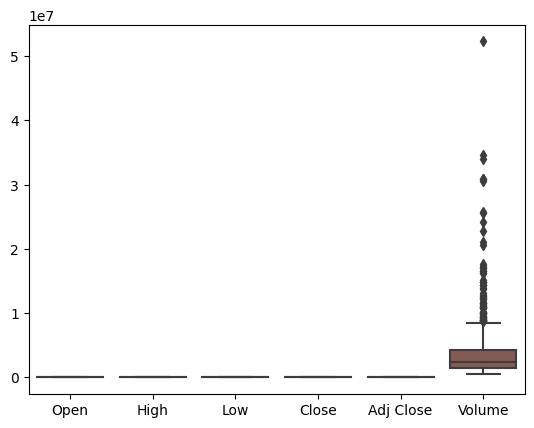

In [51]:
sns.boxplot(dataset)

In [52]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,747.000000,747.000000,747.000000,747.000000,747.000000,7.470000e+02
mean,134.070334,136.631044,131.596586,134.051526,134.051526,3.814122e+06
std,112.540302,114.486394,110.435682,112.369292,112.369292,4.605393e+06
min,8.680000,8.820000,8.570000,8.610000,8.610000,4.781380e+05
25%,21.394999,21.740000,21.150001,21.415000,21.415000,1.416450e+06
50%,132.300003,134.350006,129.100006,131.550003,131.550003,2.362100e+06
75%,185.300003,188.050003,182.825005,185.550003,185.550003,4.293620e+06
max,356.500000,360.649994,351.200012,356.000000,356.000000,5.228400e+07


In [53]:

Q1 = dataset['Volume'].quantile(0.25)
Q3 = dataset['Volume'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


dataset_new = dataset[(dataset['Volume'] >= lower_bound) & (dataset['Volume'] <= upper_bound)]




<Axes: >

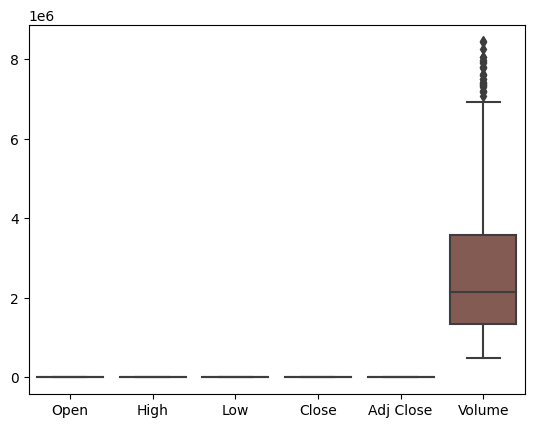

In [54]:
sns.boxplot(dataset_new)

In [55]:

Q1 = dataset_new['Volume'].quantile(0.25)
Q3 = dataset_new['Volume'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


dataset_newest = dataset_new[(dataset_new['Volume'] >= lower_bound) & (dataset_new['Volume'] <= upper_bound)]

<Axes: >

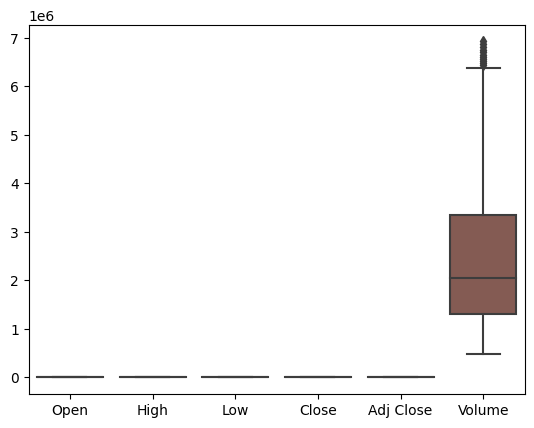

In [56]:

sns.boxplot(dataset_newest)


In [57]:
data=dataset_newest

In [58]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,135.699997,136.500000,132.600006,133.500000,133.500000,1674311.0,2020,10,01
1,137.000000,137.500000,132.050003,133.899994,133.899994,2800303.0,2020,10,05
3,144.100006,144.500000,139.800003,141.000000,141.000000,4032654.0,2020,10,07
4,142.800003,143.350006,139.649994,140.899994,140.899994,2491175.0,2020,10,08
5,141.399994,142.649994,138.000000,138.449997,138.449997,1423879.0,2020,10,09


C:\Users\tusha\AppData\Local\Temp\ipykernel_34548\3218051027.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Open"])


<Axes: xlabel='Open', ylabel='Density'>

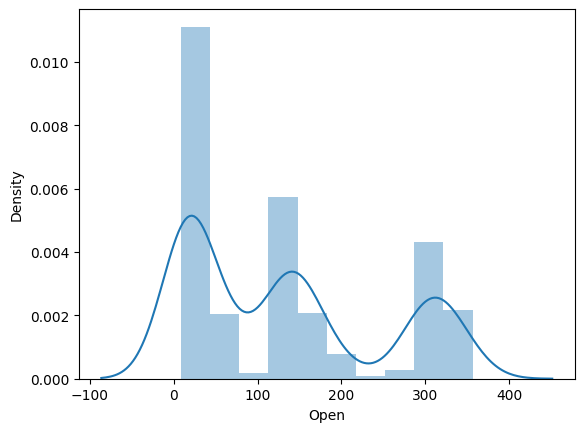

In [60]:
sns.distplot(data["Open"])

C:\Users\tusha\AppData\Local\Temp\ipykernel_34548\2693321050.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Close"])


<Axes: xlabel='Close', ylabel='Density'>

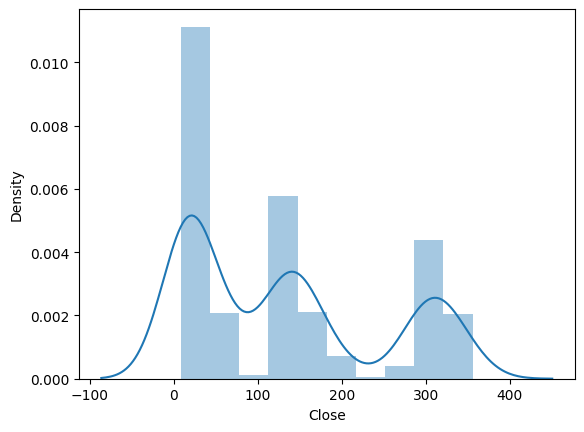

In [61]:
sns.distplot(data["Close"])

In [62]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
Open,1.000000,0.999822,0.999739,0.999580,0.999580,0.225394,0.282520,-0.156376,0.002171
High,0.999822,1.000000,0.999788,0.999847,0.999847,0.230520,0.283257,-0.157973,0.002065
Low,0.999739,0.999788,1.000000,0.999840,0.999840,0.220893,0.283698,-0.154899,0.001827
Close,0.999580,0.999847,0.999840,1.000000,1.000000,0.225816,0.283790,-0.156137,0.001234
Adj Close,0.999580,0.999847,0.999840,1.000000,1.000000,0.225816,0.283790,-0.156137,0.001234
Volume,0.225394,0.230520,0.220893,0.225816,0.225816,1.000000,-0.159702,-0.078954,-0.045236
Year,0.282520,0.283257,0.283698,0.283790,0.283790,-0.159702,1.000000,-0.754304,0.020821
Month,-0.156376,-0.157973,-0.154899,-0.156137,-0.156137,-0.078954,-0.754304,1.000000,-0.014616
Day,0.002171,0.002065,0.001827,0.001234,0.001234,-0.045236,0.020821,-0.014616,1.000000


In [64]:
Data=data.drop("Adj Close",axis=1)

In [66]:
Data.head()

,Open,High,Low,Close,Volume,Year,Month,Day
0,135.699997,136.500000,132.600006,133.500000,1674311.0,2020,10,01
1,137.000000,137.500000,132.050003,133.899994,2800303.0,2020,10,05
3,144.100006,144.500000,139.800003,141.000000,4032654.0,2020,10,07
4,142.800003,143.350006,139.649994,140.899994,2491175.0,2020,10,08
5,141.399994,142.649994,138.000000,138.449997,1423879.0,2020,10,09


In [68]:
Data.to_csv("TATA_DATA.csv")